After getting some insightful information by doing exploratory data analysis we can 
now start implementing our model

 Our GOAL :

1.Predicting the Fastest and Average shipment duration of goods/product from the date of order.

2.Late_risk_classification model for predicting order with high risk(1) and low risk(0).

**Importing Libraries**

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,accuracy_score,classification_report,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv(r'C:\Users\LENOVO\Desktop\ANN CLASS\DataCosupplyChainDataset.csv',header=0,encoding='unicode_escape')
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


Now we need to perform some data preprocessing 
1.)Feature Engineering
2.)Feature Selection

**Feature Engineering**

In [4]:
#Coverting features that represnt time and date to datetime datatype.
df['order_date'] = pd.to_datetime(df['order date (DateOrders)'])
df['shipping_date']=pd.to_datetime(df['shipping date (DateOrders)'])
df['order_year'] = pd.DatetimeIndex(df['order_date']).year
df['order_month'] = pd.DatetimeIndex(df['order_date']).month
df['order_day'] = pd.DatetimeIndex(df['order_date']).day
df['shipping_year'] = pd.DatetimeIndex(df['shipping_date']).year
df['shipping_month'] = pd.DatetimeIndex(df['shipping_date']).month
df['shipping_day'] = pd.DatetimeIndex(df['shipping_date']).day

In [5]:
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,shipping date (DateOrders),Shipping Mode,order_date,shipping_date,order_year,order_month,order_day,shipping_year,shipping_month,shipping_day
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,2/3/2018 22:56,Standard Class,2018-01-31 22:56:00,2018-02-03 22:56:00,2018,1,31,2018,2,3
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,1/18/2018 12:27,Standard Class,2018-01-13 12:27:00,2018-01-18 12:27:00,2018,1,13,2018,1,18
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,1/17/2018 12:06,Standard Class,2018-01-13 12:06:00,2018-01-17 12:06:00,2018,1,13,2018,1,17
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,1/16/2018 11:45,Standard Class,2018-01-13 11:45:00,2018-01-16 11:45:00,2018,1,13,2018,1,16
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,1/15/2018 11:24,Standard Class,2018-01-13 11:24:00,2018-01-15 11:24:00,2018,1,13,2018,1,15


In [6]:
len(df)

180519

In [8]:
df.shape

(180519, 61)

**Selecting Important Feature**

In [9]:
impo_features = ['Type','Days for shipping (real)','Days for shipment (scheduled)','Late_delivery_risk','Benefit per order',
                        'Sales per customer','Latitude','Longitude','Shipping Mode','Order Status','Order Region',
                        'Order Country','Order City','Market','Delivery Status','order_day','order_month','order_year',
                        'shipping_day','shipping_month','shipping_year']

In [12]:
new_df=df[impo_features]
model=new_df
new_df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Late_delivery_risk,Benefit per order,Sales per customer,Latitude,Longitude,Shipping Mode,Order Status,...,Order Country,Order City,Market,Delivery Status,order_day,order_month,order_year,shipping_day,shipping_month,shipping_year
0,DEBIT,3,4,0,91.250000,314.640015,18.251453,-66.037056,Standard Class,COMPLETE,...,Indonesia,Bekasi,Pacific Asia,Advance shipping,31,1,2018,3,2,2018
1,TRANSFER,5,4,1,-249.089996,311.359985,18.279451,-66.037064,Standard Class,PENDING,...,India,Bikaner,Pacific Asia,Late delivery,13,1,2018,18,1,2018
2,CASH,4,4,0,-247.779999,309.720001,37.292233,-121.881279,Standard Class,CLOSED,...,India,Bikaner,Pacific Asia,Shipping on time,13,1,2018,17,1,2018
3,DEBIT,3,4,0,22.860001,304.809998,34.125946,-118.291016,Standard Class,COMPLETE,...,Australia,Townsville,Pacific Asia,Advance shipping,13,1,2018,16,1,2018
4,PAYMENT,2,4,0,134.210007,298.250000,18.253769,-66.037048,Standard Class,PENDING_PAYMENT,...,Australia,Townsville,Pacific Asia,Advance shipping,13,1,2018,15,1,2018


**Now performing One hot encoding so that computer can understand categorical data**

In [13]:
model = pd.get_dummies(model)
model.shape

(180519, 3823)

In [14]:
model.head()

,Days for shipping (real),Days for shipment (scheduled),Late_delivery_risk,Benefit per order,Sales per customer,Latitude,Longitude,order_day,order_month,order_year,...,Order City_Ústí nad Labem,Market_Africa,Market_Europe,Market_LATAM,Market_Pacific Asia,Market_USCA,Delivery Status_Advance shipping,Delivery Status_Late delivery,Delivery Status_Shipping canceled,Delivery Status_Shipping on time
0,3,4,0,91.250000,314.640015,18.251453,-66.037056,31,1,2018,...,0,0,0,0,1,0,1,0,0,0
1,5,4,1,-249.089996,311.359985,18.279451,-66.037064,13,1,2018,...,0,0,0,0,1,0,0,1,0,0
2,4,4,0,-247.779999,309.720001,37.292233,-121.881279,13,1,2018,...,0,0,0,0,1,0,0,0,0,1
3,3,4,0,22.860001,304.809998,34.125946,-118.291016,13,1,2018,...,0,0,0,0,1,0,1,0,0,0
4,2,4,0,134.210007,298.250000,18.253769,-66.037048,13,1,2018,...,0,0,0,0,1,0,1,0,0,0


In [15]:
model.shape

(180519, 3823)

**Model Building**

In [17]:
# our dependent feature are Days for shipping (real), Days for shipment (scheduled)
#Multi output regression as there are two output features
x = model.drop(['Days for shipping (real)','Days for shipment (scheduled)'],axis=1)
y = model[['Days for shipping (real)','Days for shipment (scheduled)']]

In [18]:
x.head()

,Late_delivery_risk,Benefit per order,Sales per customer,Latitude,Longitude,order_day,order_month,order_year,shipping_day,shipping_month,...,Order City_Ústí nad Labem,Market_Africa,Market_Europe,Market_LATAM,Market_Pacific Asia,Market_USCA,Delivery Status_Advance shipping,Delivery Status_Late delivery,Delivery Status_Shipping canceled,Delivery Status_Shipping on time
0,0,91.250000,314.640015,18.251453,-66.037056,31,1,2018,3,2,...,0,0,0,0,1,0,1,0,0,0
1,1,-249.089996,311.359985,18.279451,-66.037064,13,1,2018,18,1,...,0,0,0,0,1,0,0,1,0,0
2,0,-247.779999,309.720001,37.292233,-121.881279,13,1,2018,17,1,...,0,0,0,0,1,0,0,0,0,1
3,0,22.860001,304.809998,34.125946,-118.291016,13,1,2018,16,1,...,0,0,0,0,1,0,1,0,0,0
4,0,134.210007,298.250000,18.253769,-66.037048,13,1,2018,15,1,...,0,0,0,0,1,0,1,0,0,0


In [19]:
y.head()

,Days for shipping (real),Days for shipment (scheduled)
0,3,4
1,5,4
2,4,4
3,3,4
4,2,4


**Now Spliting the data using sklearn library**

In [21]:
x_train,x_test,y_train,y_test = model_selection.train_test_split(x,y,test_size=0.20)

**Decision Tree Regressor**

In [22]:
model=DecisionTreeRegressor()
model.fit(x_train,y_train)
pred=model.predict(x_test)

**Lets evaluate our model**

In [23]:
def metrics(y_test,pred):
    a =r2_score(y_test,pred)
    b =mean_squared_error(y_test,pred)
    c =mean_absolute_error(y_test,pred)
    print('The r-squared score of the model is ',a)
    print('The mean squared error is',b)
    print('The mean accuracy score is',c)

In [24]:
metrics(y_test,pred)

The r-squared score of the model is  0.9933217353493429
The mean squared error is 0.01757423000221582
The mean accuracy score is 0.015081431420341237


**Delivery Prediction**

In [25]:
Prediction = pd.DataFrame(pred)
prediction = Prediction.rename(columns={0:'Fastest_shipment',1:'Avg_shipment'})
prediction.head()

,Fastest_shipment,Avg_shipment
0,2.0,4.0
1,1.0,0.0
2,1.0,0.0
3,3.0,2.0
4,3.0,4.0


In [26]:
prediction['risk'] = np.where(prediction['Avg_shipment'] >= prediction['Fastest_shipment'],0,1)

In [27]:

prediction.head()

,Fastest_shipment,Avg_shipment,risk
0,2.0,4.0,0
1,1.0,0.0,1
2,1.0,0.0,1
3,3.0,2.0,1
4,3.0,4.0,0


In [28]:
l = prediction['risk']
m = x_test['Late_delivery_risk']
l.shape,m.shape

((36104,), (36104,))

**Classification model evaluation**

In [29]:
def evaluation_risk_factor(l,m):
    print('1) The accuracy of the risk predictor model is :',accuracy_score(l,m))
    print('2) Some of the key classification metrics are :')
    print(classification_report(l,m))
    ax=plt.subplot()
    sns.heatmap(confusion_matrix(l,m),annot=True,ax=ax);
    ax.set_xlabel('Predicted labels'); ax.set_ylabel('True labels')
    ax.set_title('Confusion matrix for Risk Delivery classfication');

1) The accuracy of the risk predictor model is : 0.9751551074673166
2) Some of the key classification metrics are :
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     15341
           1       1.00      0.96      0.98     20763

   micro avg       0.98      0.98      0.98     36104
   macro avg       0.97      0.98      0.97     36104
weighted avg       0.98      0.98      0.98     36104



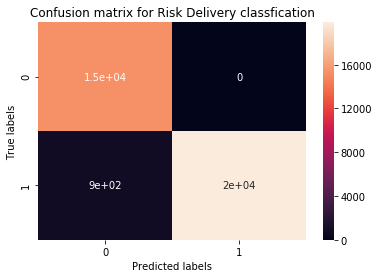

In [30]:
evaluation_risk_factor(l,m)